In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [2]:
train_data = pd.read_csv("data/train.csv")

In [3]:
train_data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.0,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636908,32060.336419,38380.641513,64297.651218
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.0,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


In [5]:
train_data.corr()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047
Adverse_Weather_Metric,-0.107925,0.040804,-0.002713,-0.028296,0.039802,-0.026647,-0.739361,0.173436,-0.021578,1.000000,0.008586


In [6]:
train_data.isnull().any()

Severity                   False
Safety_Score               False
Days_Since_Inspection      False
Total_Safety_Complaints    False
Control_Metric             False
Turbulence_In_gforces      False
Cabin_Temperature          False
Accident_Type_Code         False
Max_Elevation              False
Violations                 False
Adverse_Weather_Metric     False
Accident_ID                False
dtype: bool

In [7]:
train_label = train_data.pop('Severity')

In [8]:
train_label.tail()

9995    Significant_Damage_And_Serious_Injuries
9996                  Highly_Fatal_And_Damaging
9997    Significant_Damage_And_Serious_Injuries
9998                  Minor_Damage_And_Injuries
9999                  Highly_Fatal_And_Damaging
Name: Severity, dtype: object

In [9]:
train_data.tail()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
9995,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150,11493
9996,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898,305
9997,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173,612
9998,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381,4963
9999,50.000000,13,3,45.487694,0.382467,77.46,5,26005.322987,2,0.017036,9387


### Check that whether Accident type code and Violations are categorical.

In [10]:
for i in train_data.keys():
    length = len(train_data[i].unique().tolist())
    if(length<20):
        print(i)

Accident_Type_Code
Violations


In [11]:
train_data['Accident_Type_Code'].unique()

array([2, 7, 3, 4, 1, 6, 5], dtype=int64)

In [12]:
train_data['Violations'].unique()

array([3, 2, 1, 0, 4, 5], dtype=int64)

### Feature Engineering

In [13]:
train_data.keys()

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [14]:
for i in train_label.unique().tolist():
    print(i)

Minor_Damage_And_Injuries
Significant_Damage_And_Fatalities
Significant_Damage_And_Serious_Injuries
Highly_Fatal_And_Damaging


In [15]:
d = {'Minor_Damage_And_Injuries': 0, 
     'Significant_Damage_And_Fatalities' : 1,
     'Significant_Damage_And_Serious_Injuries' : 2,
     'Highly_Fatal_And_Damaging' : 3}

In [16]:
train_label.head()

0                  Minor_Damage_And_Injuries
1                  Minor_Damage_And_Injuries
2          Significant_Damage_And_Fatalities
3    Significant_Damage_And_Serious_Injuries
4          Significant_Damage_And_Fatalities
Name: Severity, dtype: object

In [17]:
label = {'Severity': train_label}

In [18]:
label = pd.DataFrame(label)

In [19]:
label.head()

,Severity
0,Minor_Damage_And_Injuries
1,Minor_Damage_And_Injuries
2,Significant_Damage_And_Fatalities
3,Significant_Damage_And_Serious_Injuries
4,Significant_Damage_And_Fatalities


In [20]:
NumList = []
for i in label['Severity'].tolist():
    NumList.append(d[i])
    
print(len(NumList))  
labelSeries =pd.Series(data = NumList)
train_y = pd.DataFrame({'NSeverity': labelSeries})

10000


In [21]:
train_y.head()

,NSeverity
0,0
1,0
2,1
3,2
4,1


In [22]:
Train_label = pd.concat([label,train_y],axis=1)

In [23]:
Train_label.head()

,Severity,NSeverity
0,Minor_Damage_And_Injuries,0
1,Minor_Damage_And_Injuries,0
2,Significant_Damage_And_Fatalities,1
3,Significant_Damage_And_Serious_Injuries,2
4,Significant_Damage_And_Fatalities,1


Text(0.5, 0, '%NSeverity')

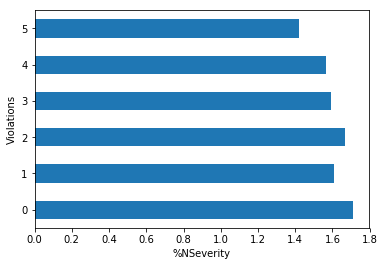

In [24]:
pd.concat([train_data,train_y],axis=1).groupby('Violations')['NSeverity'].mean().plot(kind='barh').set_xlabel('%NSeverity')

Text(0.5, 0, '%NSeverity')

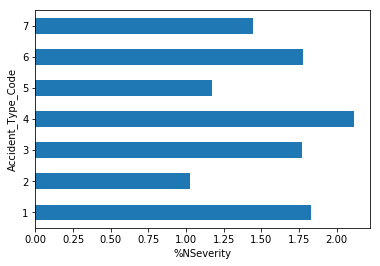

In [25]:
pd.concat([train_data,train_y],axis=1).groupby('Accident_Type_Code')['NSeverity'].mean().plot(kind='barh').set_xlabel('%NSeverity')

In [26]:
print(type(labelSeries))
print(train_data.keys())


<class 'pandas.core.series.Series'>
Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')


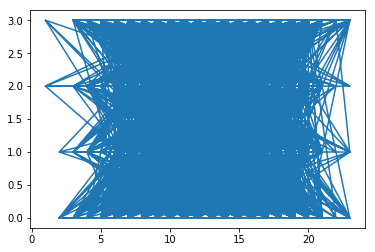

In [27]:
plt.plot(train_data['Days_Since_Inspection'],labelSeries)

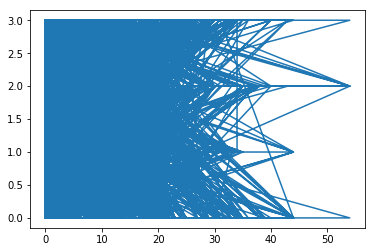

In [28]:
plt.plot(train_data['Total_Safety_Complaints'],labelSeries)

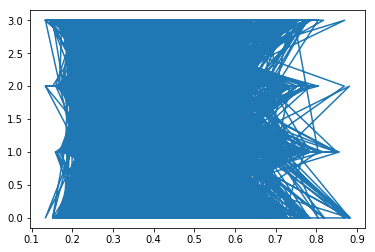

In [29]:
plt.plot(train_data['Turbulence_In_gforces'],labelSeries)

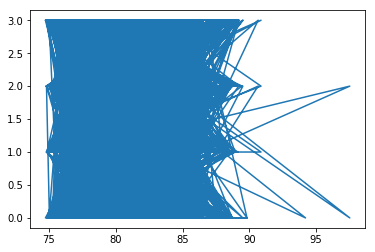

In [30]:
plt.plot(train_data['Cabin_Temperature'],labelSeries)

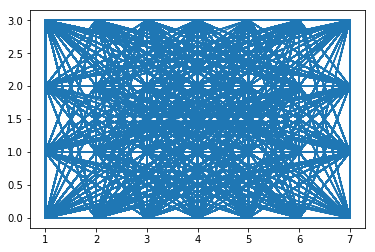

In [31]:
plt.plot(train_data['Accident_Type_Code'],labelSeries)

In [32]:
feature_columns = []

for feature in train_data.keys():
    length = len(train_data[feature].unique().tolist())
    if(length<20):
        vocab  = train_data[feature].unique()
        feature_columns.append(tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(feature,vocab)))
    else:
        feature_columns.append(tf.feature_column.numeric_column(feature))
    
print (feature_columns)

[NumericColumn(key='Safety_Score', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Days_Since_Inspection', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Total_Safety_Complaints', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Control_Metric', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Turbulence_In_gforces', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Cabin_Temperature', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Accident_Type_Code', vocabulary_list=(2, 7, 3, 4, 1, 6, 5), dtype=tf.int64, default_value=-1, num_oov_buckets=0)), NumericColumn(key='Max_Elevation', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), IndicatorColumn(categorical_column=Vocab

### train_data  = train + validation(.8 + .2)
### labelSeries = trainLabel + valLabel(.8 + .2)

###### 10000 * 0.8 = 8000
###### 10000 * 0.2 = 2000

In [33]:
train = train_data[:8000]
validation = train_data[8000:]

In [34]:
trainLabel = labelSeries[:8000]
valLabel = labelSeries[8000:] 

In [35]:
type(trainLabel)

pandas.core.series.Series

#### Input Pipeline

In [36]:
def make_input_fn (data,label,num_epochs=10,shuffle=True,batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices((dict(data),label))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds

In [37]:
train_input_fn = lambda : make_input_fn(train,trainLabel)
validation_input_fn = lambda : make_input_fn(validation,valLabel,1,False,32)

### Classifier

#### Dense Neural Network Classifier

In [38]:
classifier = tf.estimator.DNNClassifier(
                feature_columns = feature_columns,
                hidden_units = [30,10],
                n_classes = 4
                )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\alsrivas\\AppData\\Local\\Temp\\tmpju0kdmtb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000015C8BDB06A0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
from IPython.display import clear_output

In [40]:
classifier.train(train_input_fn,steps = 5000)
eval_result = classifier.evaluate(validation_input_fn)
clear_output()

print (eval_result)

{'accuracy': 0.292, 'average_loss': 9.619033, 'loss': 9.615129, 'global_step': 2500}
